In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('Mall_Customers.csv')

In [5]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
x = df.iloc[:, [3,4]]

In [7]:
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# visualize

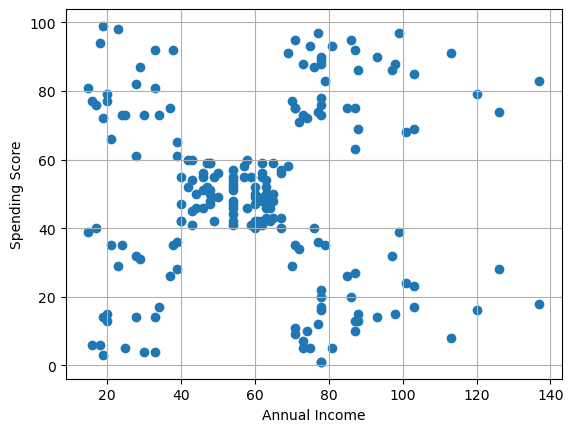

In [8]:
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid()
plt.scatter(x.iloc[:,0], x.iloc[:,1])

In [9]:
# aiwehi uski marzi..................bssssssssssssss bhi karooooooooooooo nnnnnnnnnn#


In [10]:
#### ELBOW EMTHOD TO FIND THE OPTIMAL VALUE OF K

In [11]:
from sklearn.cluster import KMeans


In [12]:
km = KMeans(n_clusters=3, random_state=0)

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
km.fit_predict(x)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [15]:
##### SUM SQAURED ERROR
km.inertia_

106348.37306211118

In [16]:
sse = []
for k in range(1,16):
    km = KMeans(n_clusters=k, random_state=0, n_init=10)
    km.fit_predict(x)
    sse.append(km.inertia_)

In [17]:
sse

[269981.28,
 181363.595959596,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37265.86520484346,
 30259.657207285465,
 25050.832307547527,
 21862.09267218289,
 19657.783608703958,
 17584.589416163646,
 16032.113097679265,
 14523.258112983112,
 13000.92742551566,
 12072.542449217452]

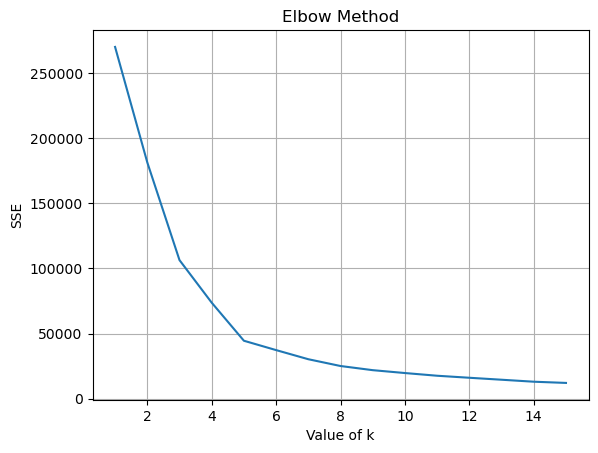

In [22]:
plt.title('Elbow Method')
plt.xlabel('Value of k')
plt.ylabel('SSE')
plt.grid()
plt.plot(range(1,16),sse,)

In [23]:
km = KMeans(random_state=0,n_clusters=5,n_init='auto')

In [24]:
y = km.fit_predict(x)

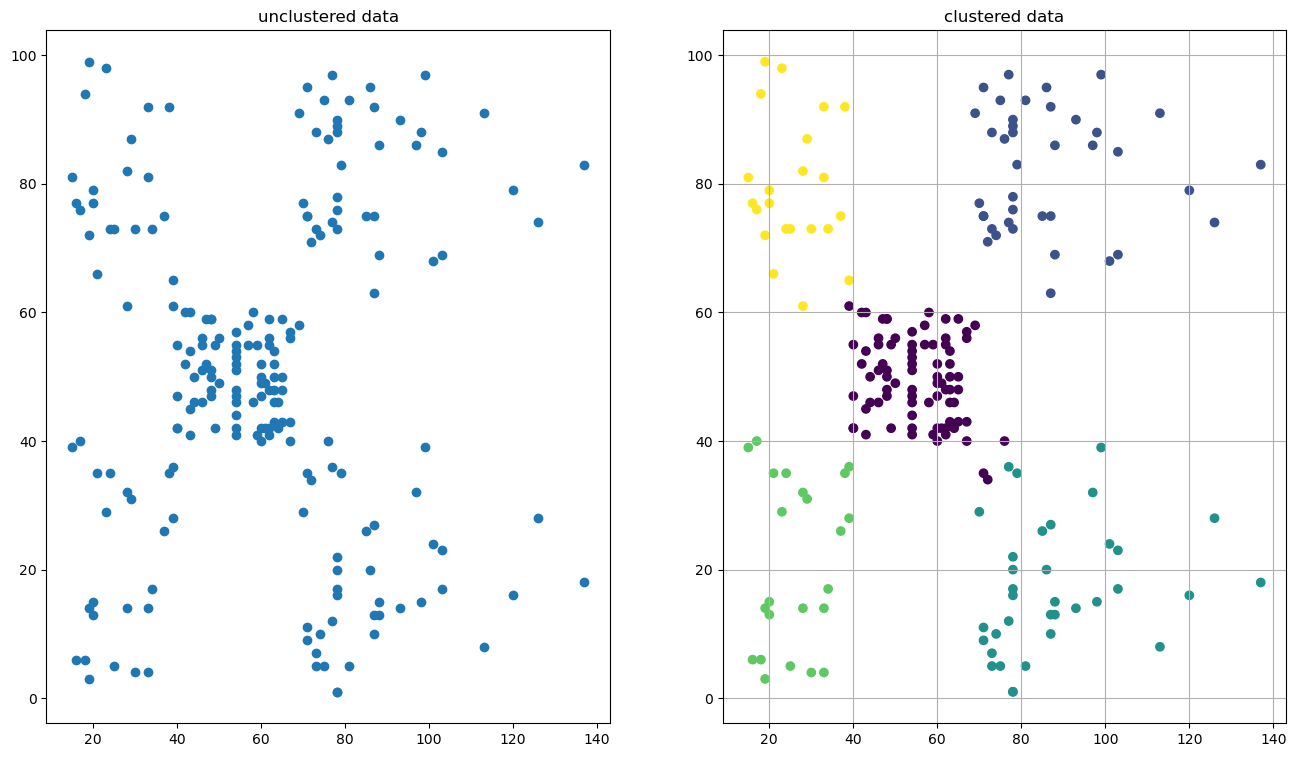

In [25]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('unclustered data')
plt.scatter(x.iloc[:,0], x.iloc[:,1])

plt.subplot(1,2,2)
plt.grid()
plt.title('clustered data')
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y)

In [29]:
cents = km.cluster_centers_

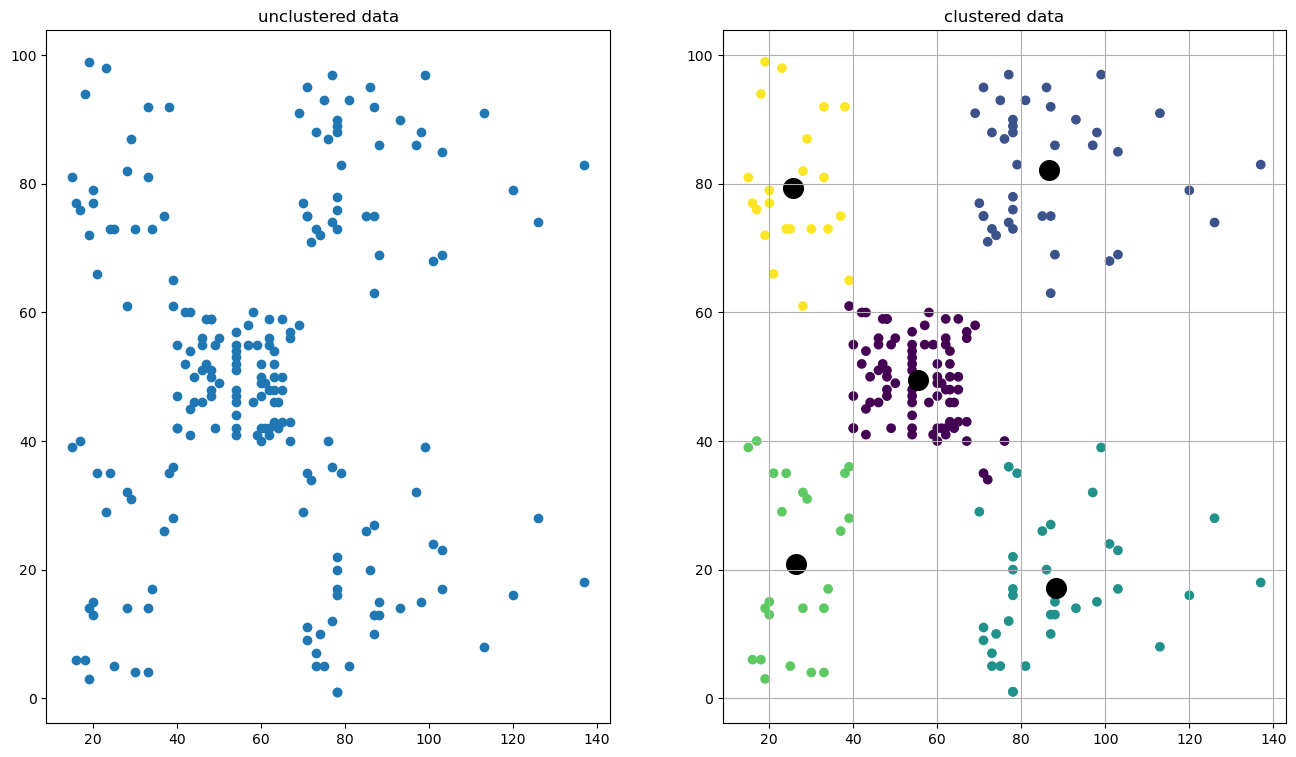

In [31]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('unclustered data')
plt.scatter(x.iloc[:,0], x.iloc[:,1])

plt.subplot(1,2,2)
plt.grid()
plt.title('clustered data')
plt.scatter(x.iloc[:,0], x.iloc[:,1], c=y)
plt.scatter(cents[:,0], cents[:,1], s = 200, color = 'k')

#### extract the clusters

In [36]:
zero = df[y == 0]
one = df[y == 1]
two = df[y == 2]
three = df[y ==3]
four = df[y == 4]


In [37]:
print('Cluster - 0: ', len(zero))
print('Cluster - 1: ', len(one))
print('Cluster - 2: ', len(two))
print('Cluster - 3: ', len(three))
print('Cluster - 4: ', len(four))

Cluster - 0:  81
Cluster - 1:  39
Cluster - 2:  35
Cluster - 3:  23
Cluster - 4:  22


In [38]:
one.to_csv('one.csv', index = False)

#### PREDICTION

In [44]:
new1 = [[34, 67]]
new2  = [[102, 47]]
new3 = [[89,93]]


In [45]:
km.predict(new1)

array([4])

In [46]:
km.predict(new2)

array([2])

In [47]:
km.predict(new3)

array([1])

In [49]:
km.predict(new1)[0],km.predict(new2)[0],km.predict(new3)[0]

(4, 2, 1)